In [1]:
# ライブラリのインポート
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets

# 乱数シード固定
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(0)

In [2]:
# データ変換の定義
transform = transforms.Compose([
    #transforms.Grayscale(),
    transforms.ToTensor(),
])

# データセットの読み込み
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform)

# データローダーの作成
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False)

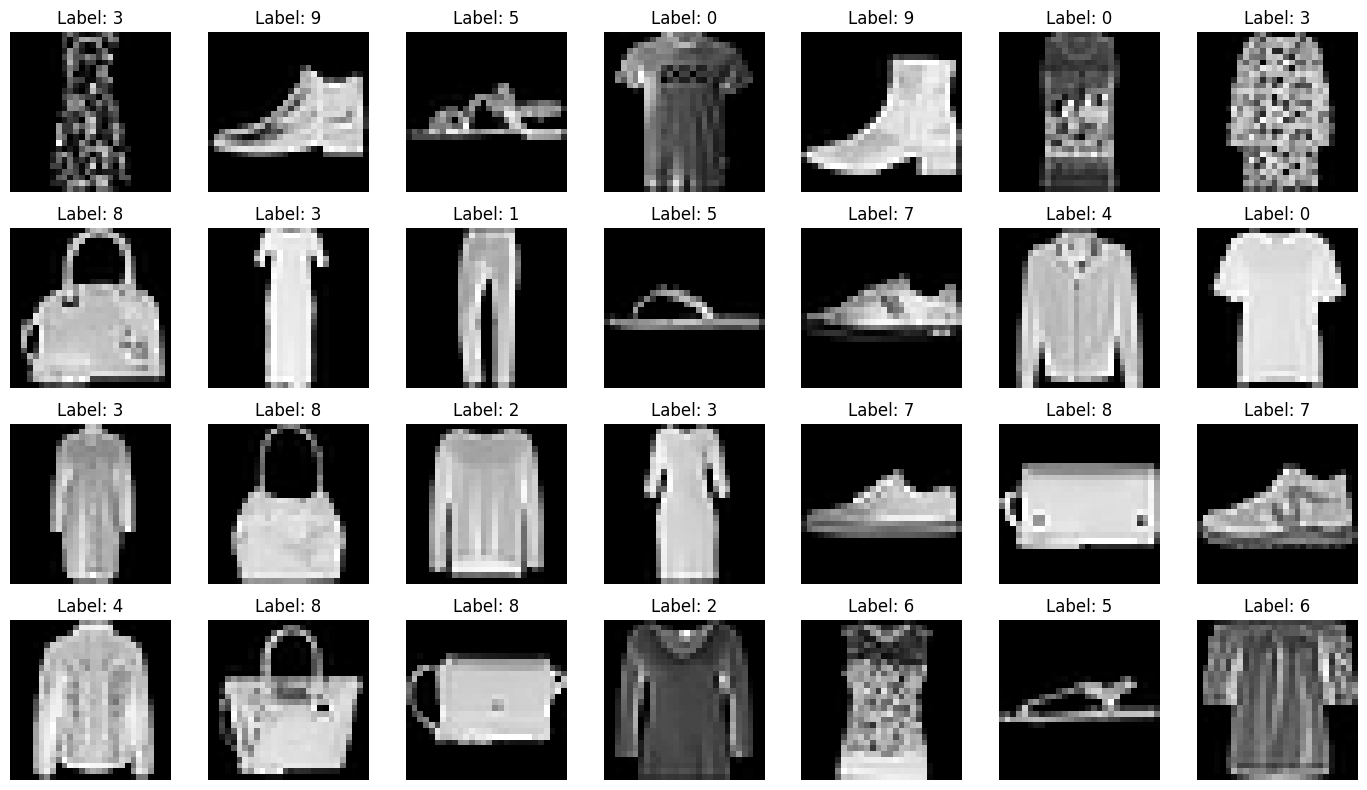

In [3]:
# 画像を表示
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(14, 8))
for i, ax in enumerate(axes.flatten()):
    img = images[i].numpy().squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# モデルの定義
"""model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.25),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.25),
    nn.Linear(256, 10),
)"""

model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),

    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# 損失関数・最適化手法の定義
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [8]:
# 学習
model.train()
num_epochs = 5
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader, 0):
        # 入力, 正解ラベルを取得
        inputs, labels = data

        # 勾配をゼロに初期化
        optimizer.zero_grad()

        # 出力を得る
        outputs = model(inputs)

        # 損失計算から誤差逆伝播により、パラメータを更新する
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 損失を加算
        if (i + 1) % (total_step // 5) == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")
    print(" = = = = = = = = = = = = = = = = = = =")

Epoch [1/5], Step [187/938], Loss: 0.4893
Epoch [1/5], Step [374/938], Loss: 0.5137
Epoch [1/5], Step [561/938], Loss: 0.4416
Epoch [1/5], Step [748/938], Loss: 0.2938
Epoch [1/5], Step [935/938], Loss: 0.3296
 = = = = = = = = = = = = = = = = = = =
Epoch [2/5], Step [187/938], Loss: 0.3426
Epoch [2/5], Step [374/938], Loss: 0.2076
Epoch [2/5], Step [561/938], Loss: 0.3089
Epoch [2/5], Step [748/938], Loss: 0.2748
Epoch [2/5], Step [935/938], Loss: 0.1126
 = = = = = = = = = = = = = = = = = = =
Epoch [3/5], Step [187/938], Loss: 0.1569
Epoch [3/5], Step [374/938], Loss: 0.2643
Epoch [3/5], Step [561/938], Loss: 0.2017
Epoch [3/5], Step [748/938], Loss: 0.2632
Epoch [3/5], Step [935/938], Loss: 0.3125
 = = = = = = = = = = = = = = = = = = =
Epoch [4/5], Step [187/938], Loss: 0.1718
Epoch [4/5], Step [374/938], Loss: 0.2153
Epoch [4/5], Step [561/938], Loss: 0.2338
Epoch [4/5], Step [748/938], Loss: 0.2331
Epoch [4/5], Step [935/938], Loss: 0.2407
 = = = = = = = = = = = = = = = = = = =
Epoc

In [9]:
# テストデータで正解率を計算
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total} %')

Accuracy on the test images: 88.27 %
